# Week 3: Inner Product Spaces
Demo by Magnus Troen

In [118]:
from sympy import*
from dtumathtools import*
init_printing()

## Inner Product in SymPy

The usual inner product $\left<\cdot, \cdot \right>$ in a inner product space $V\subseteq \mathbb{F}^n$ is given by:

$$
\left<\cdot, \cdot \right>: V \times V \to \mathbb{F},\phantom{...} \left<\boldsymbol{x}, 
\boldsymbol{y} \right> = \sum_{k=1}^{n} x_k\overline{y}_k,
$$

For all $\boldsymbol{x},\boldsymbol{y} \in V$.


This can be done in `SymPy` using the command $\verb|x1.dot(x2, conjugate_convention = 'right')|$. 

To avoid writing this everytime we want a inner product we define the function `inner`:

In [ ]:
def inner(x1: Matrix,x2: Matrix):
    '''
    Computes the inner product of two vectors of same length.
    '''
    
    return x1.dot(x2, conjugate_convention = 'right')

MutableDenseMatrix.inner = inner
ImmutableDenseMatrix.inner = inner

We'll now check that the function behaves as expected:

We'll check with the vectors

$$
x_1 = \left[\begin{matrix}1\\2\end{matrix}\right],
x_2 = \left[\begin{matrix}2 - i\\2\end{matrix}\right]
$$

$$
\left<x_1,x_2\right> = 1\cdot(\overline{2-i}) + 2\cdot \overline{2} = 2+i + 4= 6 + i.
$$

In [167]:
x1 = Matrix([1, 2])
x2 = Matrix([2-I, 2])

x1.inner(x2), inner(x1,x2)

As expected.

## Projections onto a Line

Let $\boldsymbol{x}, \boldsymbol{y} \in \mathbb{F}^n$, then the projection of $\boldsymbol{x}$ onto the line $Y = span\{\boldsymbol{y}\}$ can be computed as

$$
\operatorname{Proj}_Y(\boldsymbol{x}) = \frac{\left<\boldsymbol{x},\boldsymbol{y} \right>}{\left<\boldsymbol{y},\boldsymbol{y} \right>}\boldsymbol{y}
= \left<\boldsymbol{x},\boldsymbol{u}\right>\boldsymbol{u},
$$

where $\boldsymbol{u} = \frac{\boldsymbol{y}}{||\boldsymbol{y}||}$. In this demo we'll use the 2-norm.

### Example in $\mathbb{R}^2$

First let $\boldsymbol{x}_1, \boldsymbol{x}_2 \in \mathbb{R}^2$ be given by:

$$
\boldsymbol{x}_1 = \begin{bmatrix} 3\\6\end{bmatrix}, \boldsymbol{x}_2 = \begin{bmatrix} 2\\1\end{bmatrix}.
$$

We whish to project $\boldsymbol{x}_1$ onto the line given by $X_2 = span\{\boldsymbol{x}_2\}$

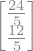

In [196]:
x1 = Matrix([3,6])
x2 = Matrix([2,1])

projX2 = x1.inner(x2)/x2.inner(x2)*x2
projX2

Since we are working in $\mathbb{R}^2$, this can be illustrated:

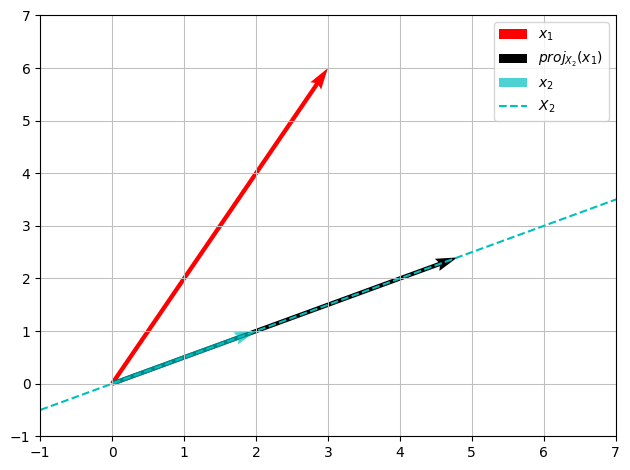

In [234]:
x = symbols('x')
plot_x1 = dtuplot.quiver((0,0),x1,rendering_kw={'color':'r', 'label': '$x_1$'}, xlim = (-1,7), ylim = (-1,7), show = False)
plot_x2 = dtuplot.quiver((0,0),x2,rendering_kw={'color':'c', 'label': '$x_2$', 'alpha': 0.7}, show = False)
plot_projX2 = dtuplot.quiver((0,0),projX2,rendering_kw={'color':'k', 'label': '$proj_{X_2}(x_1)$'},show = False)
plot_X2 = dtuplot.plot(x2[1]/x2[0] * x, label = '$X_2$',rendering_kw={'color':'c', 'linestyle': '--'}, legend = True,show = False)

(plot_x1 + plot_projX2 + plot_x2 + plot_X2).show()

### Example in $\mathbb{C}^4$ using Linear Maps

First we define the vectors:


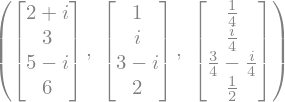

In [174]:
c1 = Matrix([2+I, 3, 5-I, 6])
c2 = Matrix([1, I, 3-I, 2])
u = simplify(c2/c2.norm())
c1,c2,u

Now the projection $Proj_{c_2}$ can be described using the linear map:

$$
\boldsymbol{P}: \mathbb{C}^4 \to \mathbb{C}^4, \phantom{...} \boldsymbol{P}(\boldsymbol{c}_1) = \boldsymbol{u}\boldsymbol{u}^* \boldsymbol{c_1}
$$

where $\boldsymbol{u} = c_2/||c_2||_2$

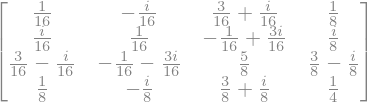

In [175]:
P = expand(u*u.adjoint())
P

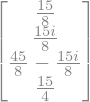

In [184]:
simplify(P*c1)

We can check that this yeilds the same result as the previous method:

In [185]:
simplify(P*c1 - c1.inner(u)/u.inner(u)*u)

The matrix $\boldsymbol{P}$ is pr defintion **hermitian**, which means that $\boldsymbol{P} = \boldsymbol{P}^*$. This can be tested by:

In [178]:
P.is_hermitian

True

or,

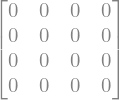

In [179]:
simplify(P-P.adjoint())

# Orthonormal Basis

Orthonormal bases show to be incredibly practical. One example is change of basis, which is way easier using othonormal bases.

For example let

$$
\beta = \{_e\boldsymbol{u}_1,_e\boldsymbol{u}_2,_e\boldsymbol{u}_3\} = \left\{ 
    \left[\begin{matrix}\frac{\sqrt{3}}{3}\\\frac{\sqrt{3}}{3}\\\frac{\sqrt{3}}{3}\end{matrix}\right],
    \left[\begin{matrix}\frac{\sqrt{2}}{2}\\0\\- \frac{\sqrt{2}}{2}\end{matrix}\right],
    \left[\begin{matrix}- \frac{\sqrt{6}}{6}\\\frac{\sqrt{6}}{3}\\- \frac{\sqrt{6}}{6}\end{matrix}\right]
\right\}
$$

be an orthonormal basis for $\mathbb{R}^3$. Now $\phantom{ }_\beta\boldsymbol{x}$ can be computed by:

$$
\phantom{ }_\beta\boldsymbol{x} = \begin{bmatrix} \left<_e\boldsymbol{u}_1, \phantom{ }_e\boldsymbol{x} \right>\\
                                                  \left<_e\boldsymbol{u}_2, \phantom{ }_e\boldsymbol{x} \right>\\
                                                  \left<_e\boldsymbol{u}_3, \phantom{ }_e\boldsymbol{x} \right> \end{bmatrix}
$$

for all $\boldsymbol{x} \in \mathbb{R}^3$

We can start by convincing ourselves that $\beta$ is indeed an orthonormal basis for $\mathbb{R}^3$. First and foremost, $\boldsymbol{u}_1, \boldsymbol{u}_2,\boldsymbol{u}_3$ should be mutually orthonormal. Meaning that they should satisfy

$$
\left< \boldsymbol{u}_i, \boldsymbol{u}_j\right> = \begin{cases} 0 & i \neq j\\ 1 & i = j\end{cases},\phantom{...} i,j = 1,2,3.
$$

In [235]:
u1 = Matrix([sqrt(3)/3, sqrt(3)/3, sqrt(3)/3])
u2 = Matrix([sqrt(2)/2, 0, -sqrt(2)/2])
u3 = u1.cross(u2)

u1.inner(u1), u1.inner(u2), u1.inner(u3), u2.inner(u2), u2.inner(u3), u3.inner(u3) 

We have now shown that $\beta$ is spanned by 3 orthonomal vectors in $\mathbb{R}^3$, hence we can conclude that $\beta$ is an orthonormal basis for $\mathbb{R}^3$

Now we can, for example, compute  $\boldsymbol{x} = [1,2,3]$ in the $\beta$-basis.

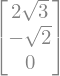

In [237]:
x = Matrix([1,2,3])
beta_x = Matrix([x.inner(u1) , x.inner(u2) , x.inner(u3)])
beta_x

## Gram-Schmidt

We have been given a basis $\gamma =  v_1,v_2,v_3,v_4$ for $\mathbb{C}^4$, where

$$
\boldsymbol{v}_1 = \left[\begin{matrix}2 i\\0\\0\\0\end{matrix}\right], \:
\boldsymbol{v}_2 = \left[\begin{matrix}i\\1\\1\\0\end{matrix}\right], \:
\boldsymbol{v}_3 = \left[\begin{matrix}0\\i\\1\\1\end{matrix}\right], \:
\boldsymbol{v}_4 = \left[\begin{matrix}0\\0\\0\\i\end{matrix}\right].
$$

We wish to compute an orthonormal basis for $\gamma$. This can be done using the Gram-Schmidt process.

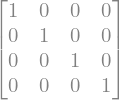

In [ ]:
v1 = Matrix([2*I,0,0, 0])
v2 = Matrix([I, 1, 1, 0])
v3 = Matrix([0, I, 1, 1])
v4 = Matrix([0, 0, 0, I])

# Confirming that the vectors span C^4
V = Matrix.hstack(v1,v2,v3,v4)
V.rref(pivots=False)

First let $\boldsymbol{w}_1 = \boldsymbol{v}_1$, then $\boldsymbol{u}_1$ is found by normalizing $\boldsymbol{w}_1$:

In [339]:
w1 = v1
u1 = w1/w1.norm()
u1

Now the remaining orthonormal vectors can be computed by:

i)

$$
\boldsymbol{w}_k = \boldsymbol{v}_k  - \sum_{j = 1}^{k-1}\left<\boldsymbol{v}_k, \boldsymbol{u}_j\right>\boldsymbol{u}_j
$$

ii)

$$
\boldsymbol{u}_k = \frac{\boldsymbol{w}_k}{||\boldsymbol{w}_k||_2}
$$

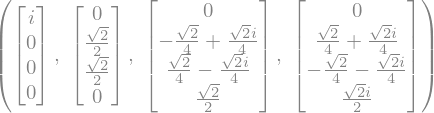

In [363]:
w2 = simplify(v2 - v2.inner(u1)*u1)
u2 = expand(w2/w2.norm())

w3 = simplify(v3 - v3.inner(u1)*u1 - v3.inner(u2)*u2)
u3 = expand(w3/w3.norm())

w4 = simplify(v4 - v4.inner(u1)*u1 - v4.inner(u2)*u2 - v4.inner(u3)*u3)
u4 = expand(w4/w4.norm())

u1,u2,u3,u4

It is left to the reader to confirm that $\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4$ are indeed orthonormal:

In [ ]:
simplify(u1.inner(u2))

The vectors $\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4$ satisfy

$$
span\left\{\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4\right\} = span\left\{\boldsymbol{v}_1,\boldsymbol{v}_2,\boldsymbol{v}_3,\boldsymbol{v}_4\right\}.
$$

Hence $\boldsymbol{u}_1,\boldsymbol{u}_2,\boldsymbol{u}_3,\boldsymbol{u}_4$ span an orthonormal basis for $\gamma$. `SymPy` is not suitable for this proof and we insteed refere to the proof for theorem 2.5.2.

The same results can be achieved using the `SymPy` command $\verb|GramSchmidt|$:

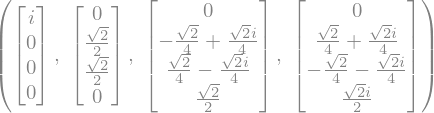

In [356]:
y1,y2,y3,y4 = GramSchmidt([v1,v2,v3,v4], orthonormal=True)
y1,y2,expand(y3),expand(y4)

## Unitary and Real Orthogonal Matrices

Square matrices that satisfy

$$
\boldsymbol{U}\boldsymbol{U}^* = \boldsymbol{U}^*\boldsymbol{U} = \boldsymbol{I}
$$

are called *unitary*.

If $\boldsymbol{U} \in M_n(\mathbb{R})$ then $\boldsymbol{U}$ is called *real ortogonal* (**NOT** orthonormal). Real ortogonal matrices satisfy

$$
\boldsymbol{QQ}^T = \boldsymbol{Q}^T\boldsymbol{Q} = \boldsymbol{I}
$$

The matrix

$$
\boldsymbol{U} = \left[\boldsymbol{u}_1, \boldsymbol{u}_2, \boldsymbol{u}_3, \boldsymbol{u}_4\right]
$$

with the u-vectors from Gram-Schmidt is unitary (this is generally true when applying Gram-Schmidt on $n$ linear independant vectors in $\mathbb{F}^n$).

The matrix is:

In [ ]:
U = Matrix.hstack(u1,u2,u3,u4)
U

The adjoint (= transposed and complex conjugated) matrix $U^*$ of $U$ is:

In [ ]:
U.adjoint(), conjugate(U.T)

That $U$ is indeed unitary can be verified by:

In [ ]:
simplify(U*U.adjoint()), simplify(U.adjoint()*U)